In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import itertools
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
## Load data
ele = pd.read_csv("data_ne.csv")
#ele = ele.drop("Unnamed: 0",axis=1)

FileNotFoundError: [Errno 2] File data_ne.csv does not exist: 'data_ne.csv'

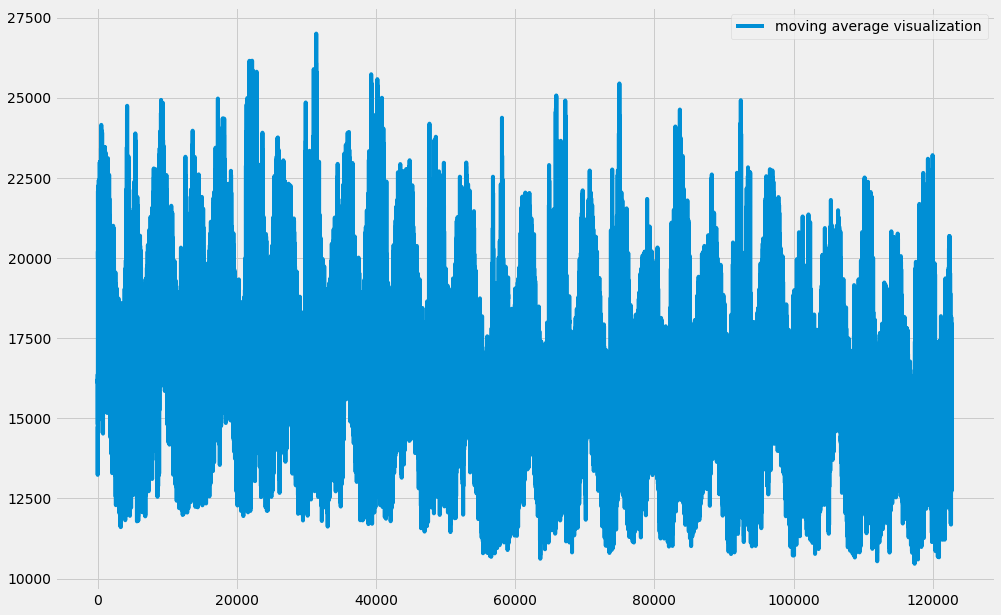

In [25]:
plt.figure(figsize = (15,10))
plt.plot(ele['Usage_ma'], label='moving average visualization')
plt.legend()
plt.show()

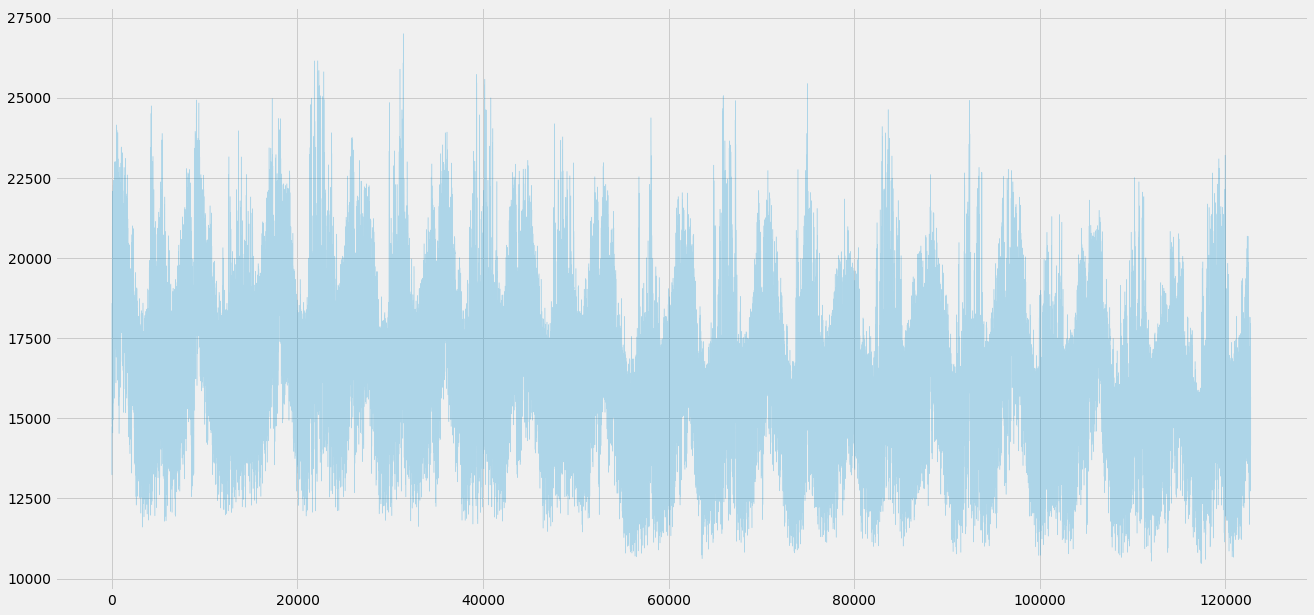

In [27]:
ele['Usage_ma'].plot(linewidth = 0.5,figsize = (20,10),alpha = 0.28)

## Data preprocessing

### Define input sequence

In [28]:
ele

,Date,Hour,Year,Month,time,Usage_ma,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_depth,cloud_cover,air_density,if_holiday,weekend,Max,Min,sta_dev
0,2003-01-01,1,2003,1,2003-01-01 01:00:00,14745.000,0.010,-1.720,0.000,0.000,0.001,17.431,0.320,1.261,True,False,18594.000,13236.000,1789.888
1,2003-01-01,2,2003,1,2003-01-01 02:00:00,14280.000,0.002,-2.045,0.000,0.000,0.001,17.431,0.317,1.264,True,False,18594.000,13236.000,1789.888
2,2003-01-01,3,2003,1,2003-01-01 03:00:00,13821.000,0.001,-2.402,0.000,0.000,0.001,17.430,0.296,1.267,True,False,18594.000,13236.000,1789.888
3,2003-01-01,4,2003,1,2003-01-01 04:00:00,13239.000,0.001,-2.732,0.000,0.000,0.001,17.430,0.374,1.270,True,False,18594.000,13236.000,1789.888
4,2003-01-01,5,2003,1,2003-01-01 05:00:00,13236.000,0.001,-3.083,0.000,0.000,0.001,17.430,0.607,1.272,True,False,18594.000,13236.000,1789.888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122731,2016-12-31,20,2016,12,2016-12-31 20:00:00,16260.000,0.164,0.551,65.795,394.877,0.085,16.957,0.976,1.241,False,True,17340.000,12861.000,1318.496
122732,2016-12-31,21,2016,12,2016-12-31 21:00:00,15658.000,0.186,0.455,29.811,238.015,0.086,16.960,0.973,1.241,False,True,17340.000,12861.000,1318.496
122733,2016-12-31,22,2016,12,2016-12-31 22:00:00,15195.000,0.232,0.180,4.850,52.937,0.105,16.968,0.963,1.242,False,True,17340.000,12861.000,1318.496
122734,2016-12-31,23,2016,12,2016-12-31 23:00:00,14758.000,0.246,-0.047,0.005,0.038,0.117,16.986,0.935,1.243,False,True,17340.000,12861.000,1318.496


In [29]:
from sklearn.model_selection import train_test_split
years = [i for i in range(2004,2007)]
#for year in yearts: 
columns = ["Hour","Year","Month","temperature","if_holiday","weekend"]
X_train = ele.loc[ele.year < year,columns]
y_train = ele["Usage_ma"]

X_test = ele.loc[ele.year < year,columns]
y_test = ele.loc[ele.year == year,columns]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle = False)

In [30]:
from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()

In [31]:
X_train_1 = X_train.drop(["if_holiday","weekend"],axis=1)

X_train_2 = X_train[["if_holiday","weekend"]].astype('category')

X_test_1 = X_test.drop(["if_holiday","weekend"],axis=1)

X_test_2 = X_test[["if_holiday","weekend"]].astype('category')

## column names
X_name = X_train.columns

X_train_1_scale = preprocessing.scale(X_train_1)
X_test_1_scale = preprocessing.scale(X_test_1)

## concatenate numeric scaling and categorical variables
concate_train = np.hstack((X_train_2,X_train_1_scale))
concate_test = np.hstack((X_test_2,X_test_1_scale))


In [ ]:
## DataFrame transformation
train_scale = pd.DataFrame(data = concate_train,columns = ["Hour","Year","Month","if_holiday","weekend","temperature"])
test_scale = pd.DataFrame(data = concate_test,columns = ["Hour","Year","Month","if_holiday","weekend","temperature"])

train_scale[["Hour","Year","Month","if_holiday","weekend"]] =train_scale[["Hour","Year","Month","if_holiday","weekend"]].astype('category')
test_scale[["Hour","Year","Month","if_holiday","weekend"]] =test_scale[["Hour","Year","Month","if_holiday","weekend"]].astype('category')

train_scale["temperature"] = train_scale["temperature"].astype("float64")
test_scale["temperature"] = test_scale["temperature"].astype("float64")

In [32]:
train_scale

,Hour,Year,Month,if_holiday,weekend,temperature
0,1,2003,1,True,False,-0.835
1,2,2003,1,True,False,-0.865
2,3,2003,1,True,False,-0.897
3,4,2003,1,True,False,-0.927
4,5,2003,1,True,False,-0.959
...,...,...,...,...,...,...
82228,5,2012,5,False,True,0.282
82229,6,2012,5,False,True,0.245
82230,7,2012,5,False,True,0.224
82231,8,2012,5,False,True,0.203


In [33]:
# input
in_seq1 = concate_train[:,0]
in_seq2 = concate_train[:,1]
in_seq3 = concate_train[:,2]
in_seq4 = concate_train[:,3]
in_seq5 = concate_train[:,4]
in_seq6 = concate_train[:,5]

# output
out_seq_train = np.array(y_train)

In [34]:
# input
in_seq_1 = concate_test[:,0]
in_seq_2 = concate_test[:,1]
in_seq_3 = concate_test[:,2]
in_seq_4 = concate_test[:,3]
in_seq_5 = concate_test[:,4]
in_seq_6 = concate_test[:,5]

# output
out_seq_test = np.array(y_test)

In [35]:
out_seq_test.shape

(40503,)

In [36]:
from numpy import hstack
## convert to [rows,columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1),1))
in_seq2 = in_seq2.reshape((len(in_seq2),1))
in_seq3 = in_seq3.reshape((len(in_seq1),1))
in_seq4 = in_seq4.reshape((len(in_seq4),1))
in_seq5 = in_seq5.reshape((len(in_seq4),1))
in_seq6 = in_seq6.reshape((len(in_seq5),1))


out_seq = out_seq_train.reshape((len(in_seq1),1))

# horizontally stack columns
dataset = hstack((in_seq1,in_seq2,in_seq3,in_seq4,in_seq5,in_seq6,out_seq))

In [37]:
in_seq_1 = in_seq_1.reshape((len(in_seq_1),1))
in_seq_2 = in_seq_2.reshape((len(in_seq_2),1))
in_seq_3 = in_seq_3.reshape((len(in_seq_2),1))
in_seq_4 = in_seq_4.reshape((len(in_seq_4),1))
in_seq_5 = in_seq_5.reshape((len(in_seq_5),1))
in_seq_6 = in_seq_6.reshape((len(in_seq_6),1))


out_seq_test = out_seq_test.reshape((len(in_seq_1),1))

# horizontally stack columns
dataset_1 = hstack((in_seq_1,in_seq_2,in_seq_3,in_seq_4,in_seq_5,in_seq_6,out_seq_test))

In [38]:
# split a multivaraite sequence into samples
def split_sequences(sequences,n_steps):
    X,y = list(),list()
    for i in range(len(sequences)):
        # fin the end of this pattern
        end_ix = i +n_steps
        # check if we are beyong the dataset
        if end_ix >len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x,seq_y = sequences[i:end_ix,:-1],sequences[end_ix-1,-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [39]:
n_steps = 3
n_features = 6
X, y = split_sequences(dataset,n_steps)
X_test,y_test = split_sequences(dataset_1,n_steps)

In [60]:
#import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
#import tensorflow 

# define model
model  = Sequential()
model.add(LSTM(50,activation = "relu",input_shape = (n_steps,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = "mse")

In [ ]:
#def get_lstm_model(n_timesteps, backwards):
#    model = Sequential()
#    model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
#    model.add(TimeDistributed(Dense(1, activation='relu')))
#    model.compile(loss='mae', optimizer='adam')
#    return model

#def get_bi_lstm_model(n_timesteps, mode):
#    model = Sequential()
#    model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
#    model.add(TimeDistributed(Dense(1, activation='relu')))
#    model.compile(loss='mae', optimizer='adam')
#    return model

In [41]:
model.fit(X,y,epochs = 200,verbose=0) 

In [46]:
X_test.shape

(40501, 3, 6)

In [47]:
#x_training
yhat_1 = model.predict(X.reshape(82231,3,6),verbose = 0)

In [48]:
#x_testing
yhat_2 = model.predict(X_test.reshape(40501,3,6),verbose = 0)

### plot of training set 

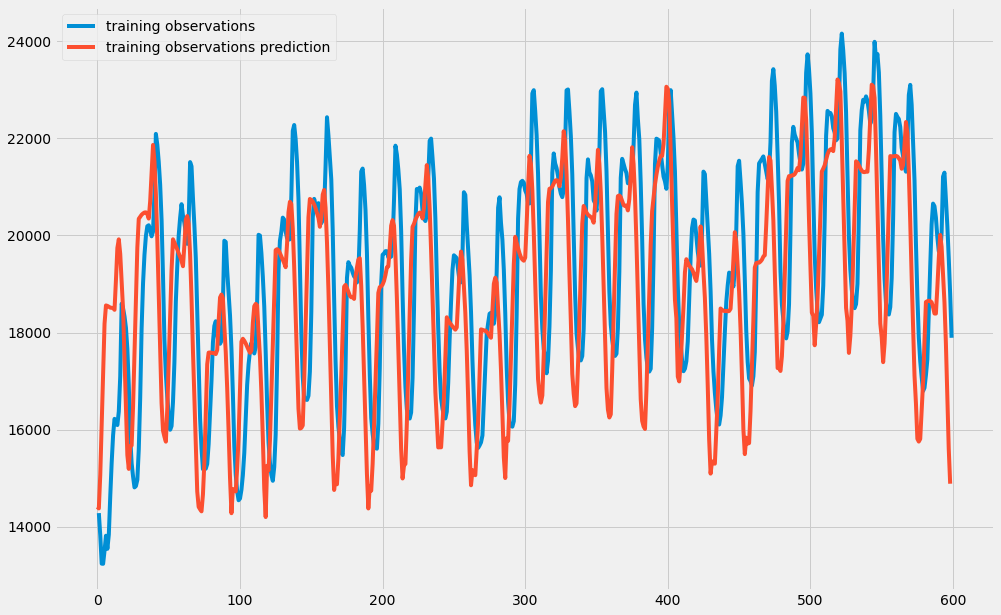

In [57]:
## training visualization
plt.figure(figsize = (15,10))
plt.plot(y_train[1:600],label = "training observations")
plt.plot(yhat_1[1:600],label = "training observations prediction")
plt.legend()
plt.show()

## cross validation